In [30]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%precision 3

np.random.seed(0)

## 확률
### 수학적 확률

In [2]:
# 주사위 던지기 결과값을 배열로 저장
dice_data = np.array([1,2,3,4,5,6])

# 인수는 대상 데이터 dice_data에서 하나의 값을 무작위로 추출한다는 의미
print('숫자 하나만 무작위로 추출:', np.random.choice(dice_data, 1))

숫자 하나만 무작위로 추출: [5]


### 통계적 확률

In [3]:
# 주사위를 1,000회 던짐
calc_steps = 1000

# 1 ~ 6의 숫자 중에서 1,000회 추출 시행
dice_rolls = np.random.choice(dice_data, calc_steps)

# 각 숫자가 추출되는 횟수의 비율을 계산
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    print(i, '가 나올 확률', p)

1 가 나올 확률 0.171
2 가 나올 확률 0.158
3 가 나올 확률 0.157
4 가 나올 확률 0.183
5 가 나올 확률 0.16
6 가 나올 확률 0.171


#### 연습문제 1
동전의 앞을 0, 뒤를 1로 표시하는 배열을 다음과 같이 생성합니다.

coin_data = np.array([0,1])

이 배열을 이용해 동전 던지기 시행을 1,000회 실시하고 그 결과 앞(값이 0)과 뒤(값이 1)가 나올 각 확률을 구하세요.

In [33]:
coin_data = np.array([0,1])

# 동전 1,000회 던지기
N = 1000

# seed 고정
np.random.seed(0)

# choice 사용
count_all_coin = np.random.choice(coin_data, N)

# 각 숫자가 추출된 비율 계산
for i in [0,1]:
    print(i,'가 나올 확률',len(count_all_coin[count_all_coin==i]) / N)

0 가 나올 확률 0.496
1 가 나올 확률 0.504


#### 연습문제 2
제비뽑기 문제를 생각해 봅시다. 1,000개의 제비 중 100개만 당첨된다고 합시다. A와 B가 차례로 제비를 뽑았을 때 A와 B 모두 당첨될 확률을 구하세요. 단, 한번 뽑은 제비는 다시 넣고 뽑지 않습니다.

X : A가 당첨될 사건  
Y : B가 당첨될 사건
    
P(X $\cap$ Y) = P(Y|X)P(X) = $ \frac{99}{999} * \frac{100}{10000} = \frac{1}{1110}$

#### 연습문제 3
질병(X)에 걸린 사람의 비율은 0.1%라고 합니다. 질병을 검사하는 방법에 대해 다음과 같은 사실을 알고 있습니다.  
- 병에 걸린 사람이 검사를 받으면 99%가 양성 반응(질병에 걸림)을 보입니다.
- 병에 걸리지 않은 사람도 검사를 받으면 3%가 양성 반응을 보입니다(오전).  

어떤 사람이 검사를 받고 양성 반응을 보였습니다. 이 사람이 질병 X에 걸렸을 확률은 몇 %인가요? 

A : 질병(X) 걸림
B : 양성 반응 보임

P(B|A) : 질병 X에 걸린 사람이 양성 반응을 보임  
P(A) : 질병 X에 걸린 사람 비율  
P(B|A$^c$) : 질병 X에 걸리지 않은 사람이 양성 반응 보임  
P(A$^c$) : 질병 X에 걸리지 않은 사람 비율

베이즈 정리를 이용하면 

In [35]:
0.99*0.001/(0.99*0.001+0.03*0.99)

0.032

## 확률변수와 확률분포
### 균등분포 : 모든 사건이 발생할 확률이 동일한 분포

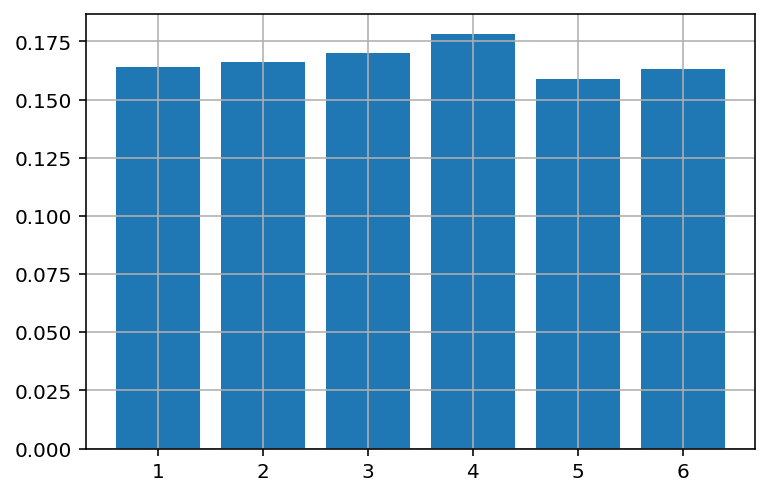

In [4]:
# 주사위를 1,000회 던짐
calc_steps = 1000

# 1 ~ 6 데이터 중에서 1,000회 추출 시행
dice_rolls = np.random.choice(dice_data, calc_steps)

# 각 숫자가 추출되는 횟수의 비율 계산
prob_data = np.array([])
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    prob_data = np.append(prob_data, len(dice_rolls[dice_rolls==i]) / calc_steps)

plt.bar(dice_data, prob_data)
plt.grid(True)

### 베르누이 분포 : 한 번의 베르누이 시행에서 각 사건이 발생할 확률분포
#### 베르누이 시행 : 결과가 '성공'  또는 '실패'의 두 가지 중 하나인 시행

In [5]:
# 0 : head(앞), 1 : tail(뒤)
# 샘플 수는 8
prob_be_data = np.array([])
coin_data = np.array([0, 0, 0, 0, 0, 1, 1, 1])

# unique로 유일한 값 추출
for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i]) / len(coin_data)
    print(i, '가 나올 확률', p)
    prob_be_data = np.append(prob_be_data, p)

0 가 나올 확률 0.625
1 가 나올 확률 0.375


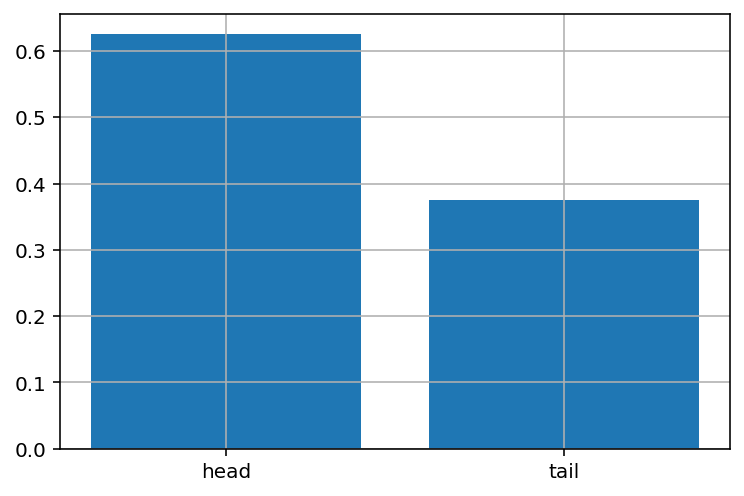

In [6]:
plt.bar([0, 1], prob_be_data, align='center')
plt.xticks([0, 1], ['head', 'tail'])
plt.grid(True)

### 이항분포 : 독립적인 베르누이 시행을 n회 반복

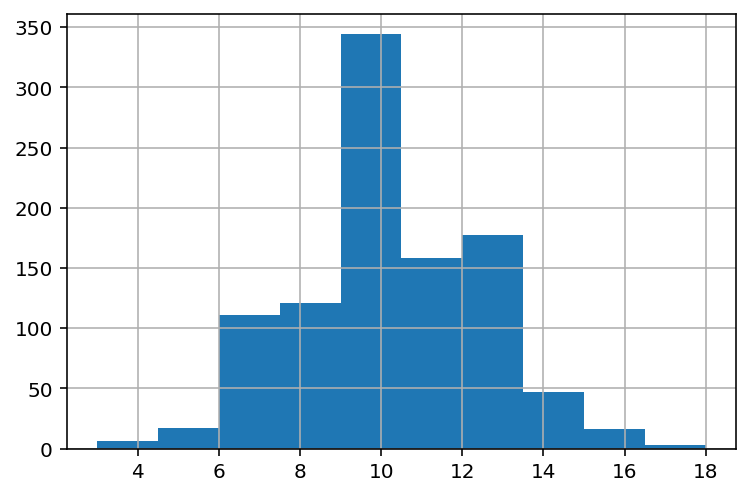

In [7]:
np.random.seed(0)

# random.binomial(시행횟수(n), 확률(p), 샘플 수) -> n회 시행하는 동안 확률 p로 발생하는 사건의 횟수
x = np.random.binomial(20, 0.5, 1000)
plt.hist(x)
plt.grid(True)

### 푸아송 분포 : 발생 가능성이 작은 사건의 확률 분포

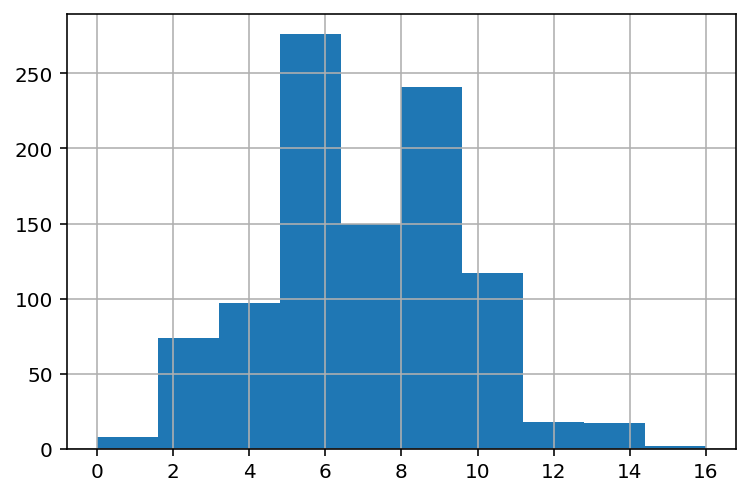

In [8]:
x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

### 정규분포 : 대표적인 연속형 확률분포

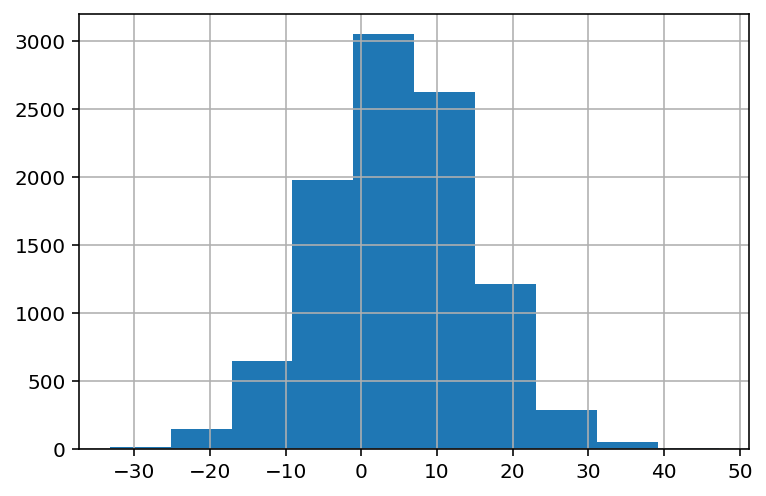

In [9]:
# np.random.normal(평균, 표준편차, 샘플 수)
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

### 로그 정규분포 : log x가 정규분포를 따를 때의 분포

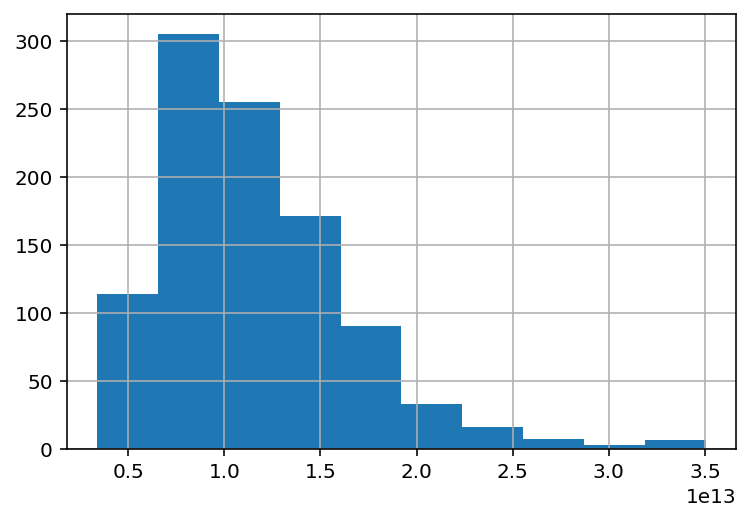

In [10]:
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

### 커널 밀도함수

In [11]:
import requests
import zipfile
from io import StringIO
import io

zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

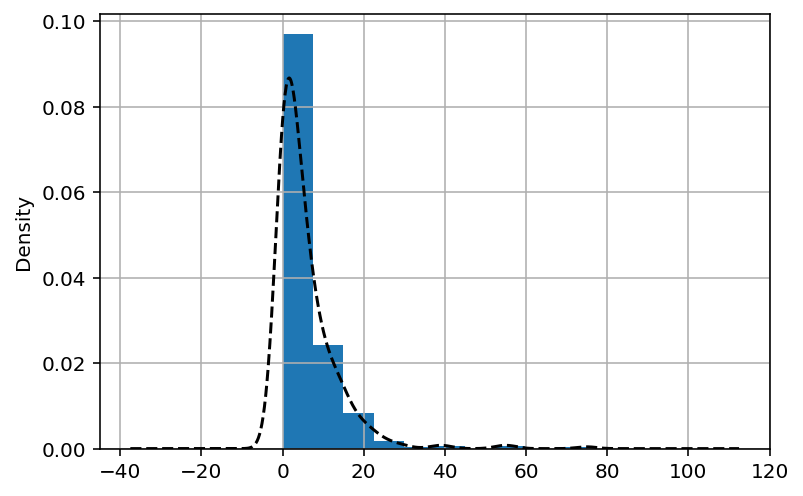

In [12]:
# 데이터 읽어 들이기
student_data_math = pd.read_csv('student-mat.csv', sep=';')

# 커널 밀도함수
student_data_math.absences.plot(kind='kde', style='k--')

# 단순한 히스토그램, density=True로 지정하면 확률로 표시
student_data_math.absences.hist(density=True)
plt.grid(True)

ㄴ> 점선 그래프가 생성된 커널 밀도함수. 데이터가 어떤 분포로부터 생성되었는지 추측 가능

#### 연습문제 4
평균 0, 분산 1을 따르는 정규분포에서 n = 100(개)의 표본을 10,000회 반복 추축하고 표본평균 $\overline{x} = \frac{1}{n}\sum_{i=1}^{n}X_{i}$의 표본분포(히스토그램)를 그리세요.

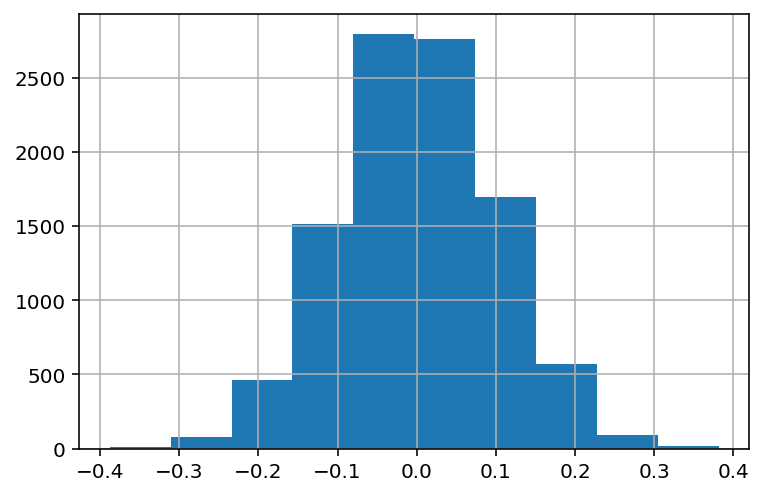

In [36]:
N = 10000
# normal version
normal_sample_data = [np.random.normal(0, 1, 100).mean() for _ in range(N)]

plt.hist(normal_sample_data)
plt.grid(True)

#### 연습문제 5
연습문제 4와 동일하게 로그 정규분포를 구현하세요.

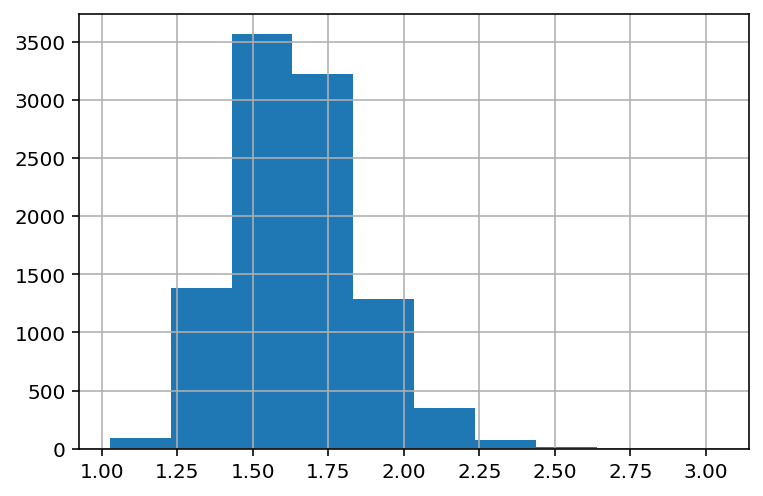

In [37]:
N = 10000
# normal version
normal_sample_data = [np.random.lognormal(0, 1, 100).mean() for _ in range(N)]

plt.hist(normal_sample_data)
plt.grid(True)

#### 연습문제 6
학생의 수학 성적 데이터(student_data_math)의 1학기 성적 G1의 히스토그램과 커널밀도 추정 곡선을 그리세요.

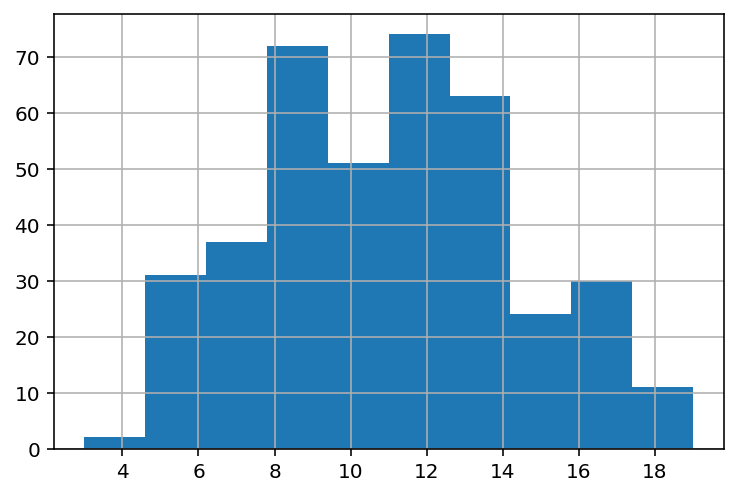

In [40]:
# 히스토그램
student_data_math = pd.read_csv('student-mat.csv', sep=';')
plt.hist(student_data_math.G1)
plt.grid(True)

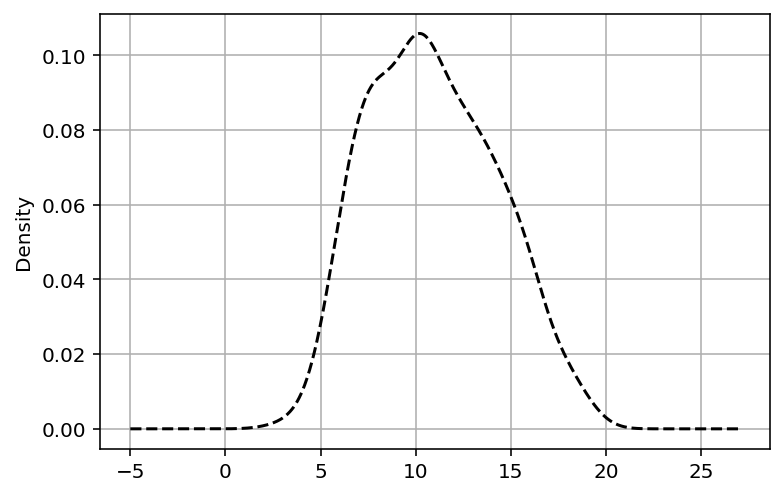

In [41]:
# 커널밀도 추정 곡선
student_data_math.G1.plot(kind='kde',style='k--')
plt.grid(True)

## 다차원확률분포

### 2차원 정규분포 시각화

In [13]:
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# 데이터 설정
x, y = np.mgrid[10:100:2, 10:100:2]

pos = np.empty(x.shape + (2, ))

pos[:, :, 0] = x
pos[:, :, 1] = y

In [14]:
# 다차원정규분포
# 각 변수의 평균과 분산공분산행렬 설정
# x와 y의 각 평균이 50과 0이고, [[100, 0], [0, 100]]은 x와 y의 공분산행렬
rv = multivariate_normal([50, 50], [[100, 0], [0, 100]])

# 확률밀도함수
z = rv.pdf(pos)

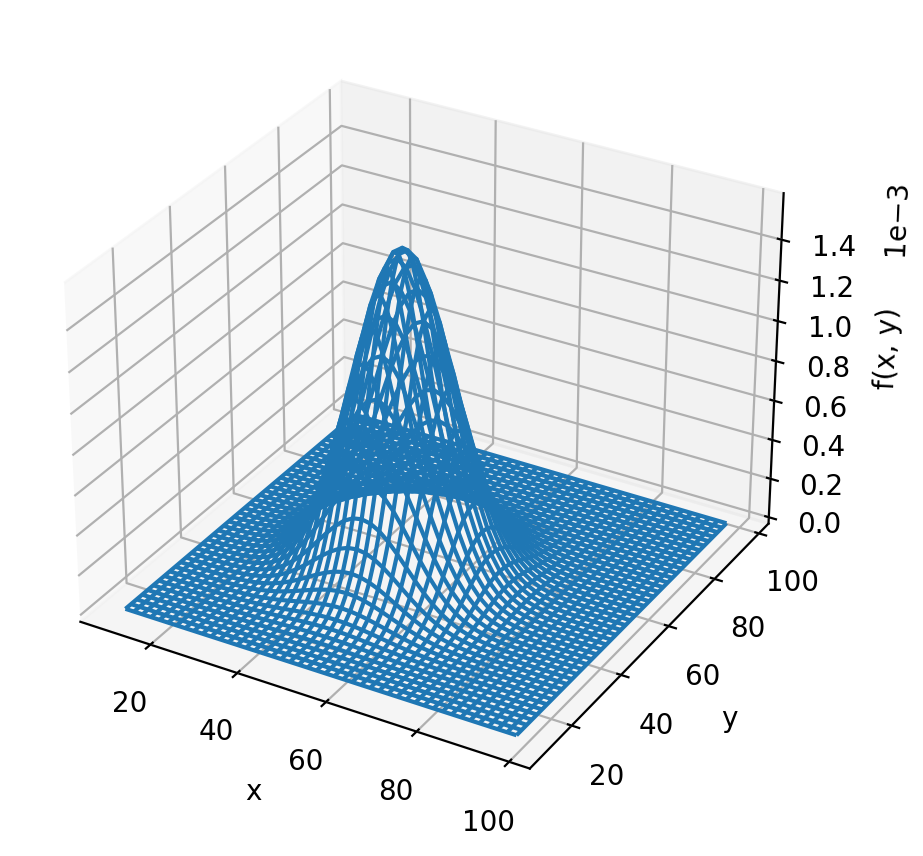

In [15]:
fig = plt.figure(dpi=100)

ax = Axes3D(fig)
ax.plot_wireframe(x, y, z)

# x, y, z 레이블 설정
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# z축 단위ㅣ 변경, sci는 지수 표시를 의미, axis로 축 설정
# scilimits=(n,m)는 n부터 m 사이 밖의 값은 지수 표기
# scilimits=(0,0) 모두 지수로 표기
ax.ticklabel_format(style='sci', axis='z', scilimits=(0, 0))

## 추론통계학

### 대수 법칙

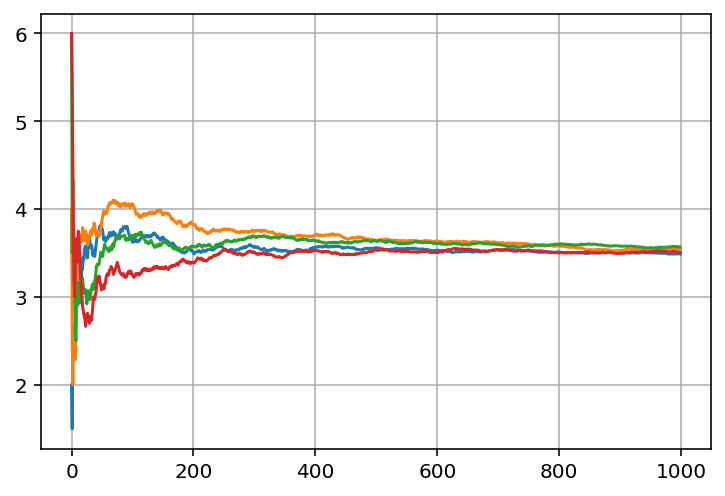

In [16]:
# 계산(주사위 던지기) 횟수
calc_times = 1000
# 주사위
sample_array = np.array([1, 2, 3, 4, 5, 6])
number_cnt = np.arange(1, calc_times + 1)

# 4개 선(line) 생성
for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p / number_cnt)
    plt.grid(True)

ㄴ> 모든 선 그래프가 N이 커질수록 3.5에 근접

### 중심극한정리 : 주사위를 던지는 횟수 N 이 커질수록 표본평균이 정규분포를 따른다는 법칙

In [17]:
def function_central_theory(N):
    
    sample_array = np.array([1, 2, 3, 4, 5, 6])
    number_cnt = np.arange(1, N + 1) * 1.0
 
    mean_array = np.array([])
 
    for i in range(1000):   
        cum_variables = np.random.choice(sample_array, N).cumsum()*1.0
        mean_array = np.append(mean_array, cum_variables[N-1] / N)
 
    plt.hist(mean_array)
    plt.grid(True)

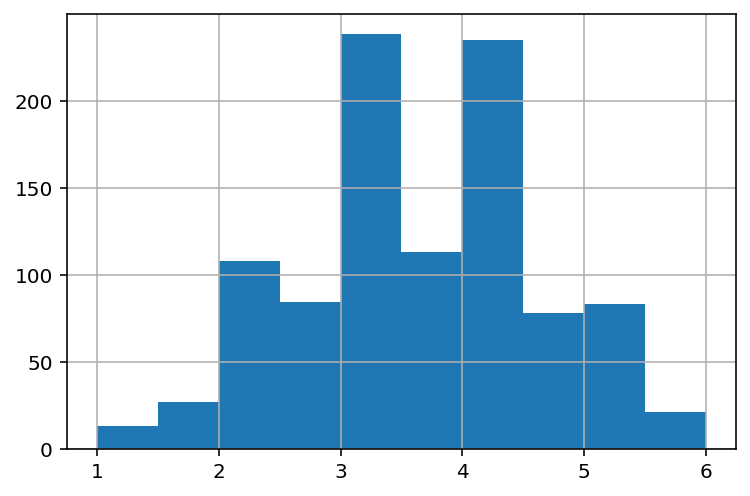

In [18]:
# N=3
function_central_theory(3)

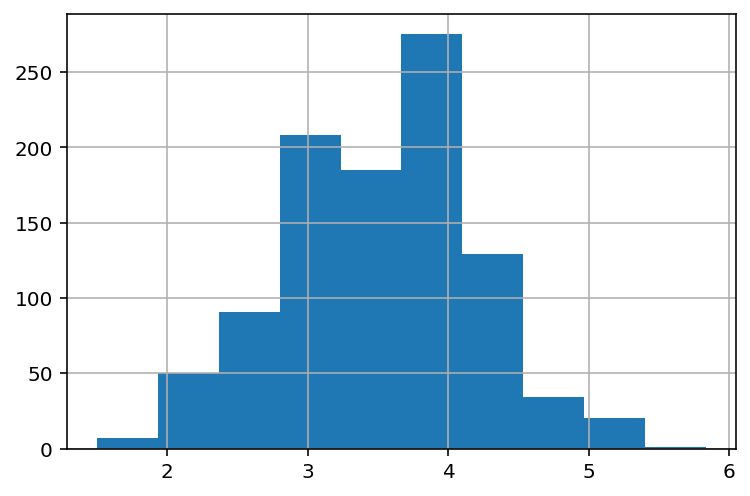

In [19]:
# N=6
function_central_theory(6)

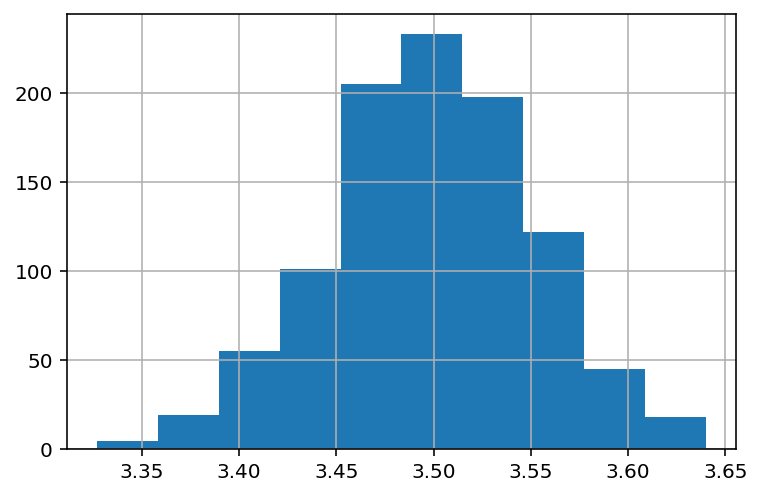

In [20]:
# N= 10^3
function_central_theory(10**3)

ㄴ> N을 증가시키면 정규분포형태가 된다

### 표본분표

### 카이제곱분포

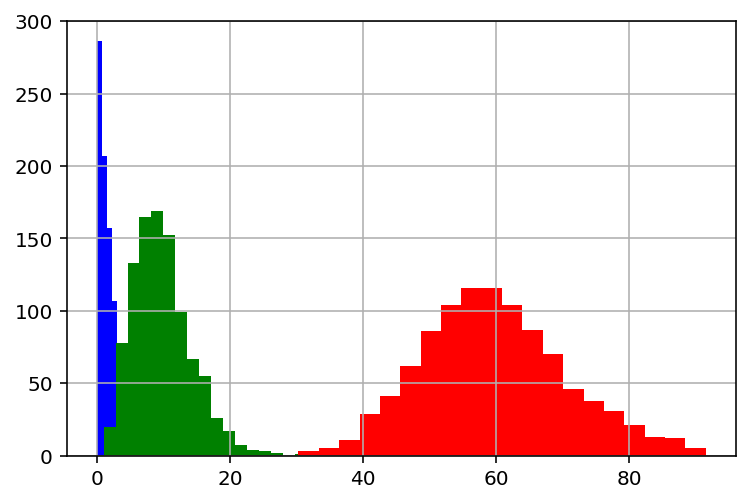

In [21]:
# 자유도 2, 10, 60을 따르는 카이제곱분포가 생성하는 난수의 히스토그램
for df, c in zip([2, 10, 60], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)
    plt.grid(True)

### 스튜던트 t 분포

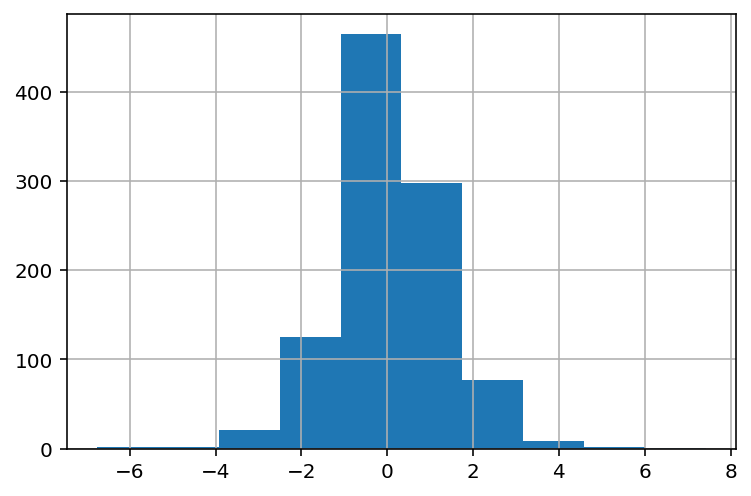

In [22]:
x = np.random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

### F 분포

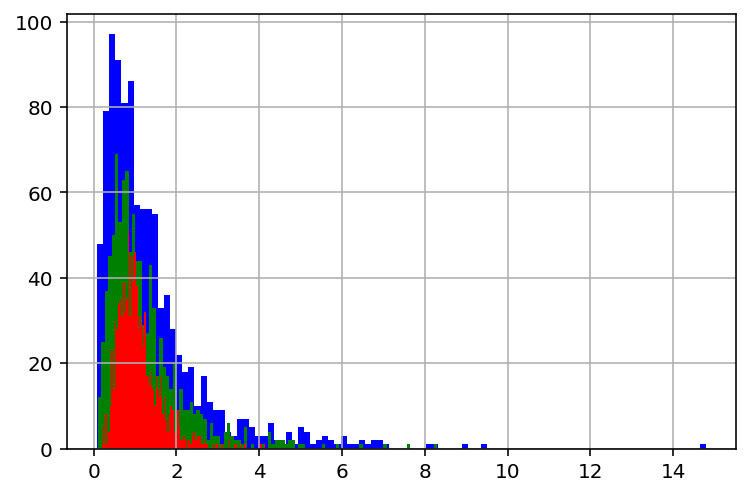

In [24]:
for df, c in zip([ (6, 7), (10, 10), (20, 25)], 'bgr'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)
    plt.grid(True)

#### 연습문제 7
자유도 5, 25, 50인 카이제곱분포를 따르는 난수를 각 1,000개씩 생성하고 히스토그램을 그리세요.

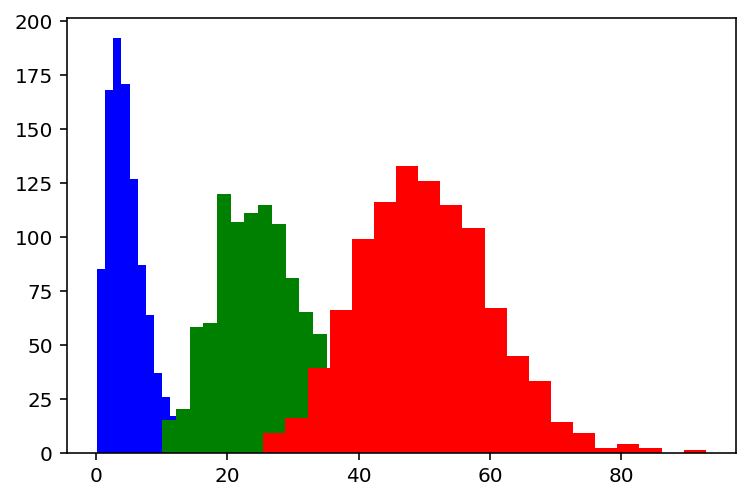

In [43]:
for df, c in zip([5,25,50], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)

#### 연습문제 8
자유도 100인 t 분포를 따르는 난수를 1,000개 생성하고 히스토그램을 그리세요.

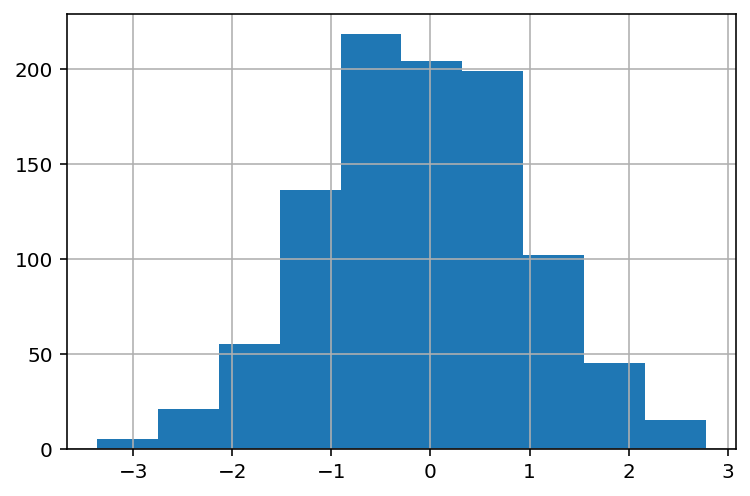

In [44]:
# t-분포
x = np.random.standard_t(100, 1000)
plt.hist(x)
plt.grid(True)

#### 연습문제 9
자유도 (10, 30), (20, 25)인 F 분포를 따르는 난수를 각 1,000개씩 생성하고 히스토그램을 그리세요.

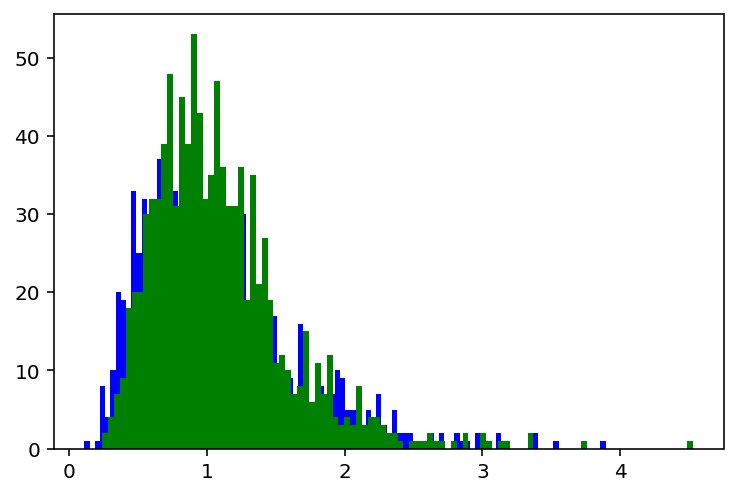

In [46]:
# F 분포
for df, c in zip([(10,30), (20,25)], 'bg'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)

## 통계적 추정

#### 연습문제

## 통계적 검정

In [25]:
# 수학 성적 데이터 읽어 오기
student_data_math = pd.read_csv('student-mat.csv', sep=';')

# 포르투갈어 성적 데이터 읽어 오기
student_data_por = pd.read_csv('student-por.csv', sep=';')

# 결합
student_data_merge = pd.merge(student_data_math
                              , student_data_por
                              , on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu'
                                      , 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']
                              , suffixes=('_math', '_por'))

print('G1 수학 성적 평균：', student_data_merge.G1_math.mean())
print('G1 포르투갈어 성적 평균：', student_data_merge.G1_por.mean())

G1 수학 성적 평균： 10.861256544502618
G1 포르투갈어 성적 평균： 12.112565445026178


### 검정

In [26]:
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print( 'p값 = ', p)

p값 =  1.6536555217100788e-16


#### 연습문제

#### 종합문제